# Worksheet 18

Name:  Ivan Nikitovic

UID:    U91810047

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3124999999999998
[1, 1, 1, 0, 1]
0.15625


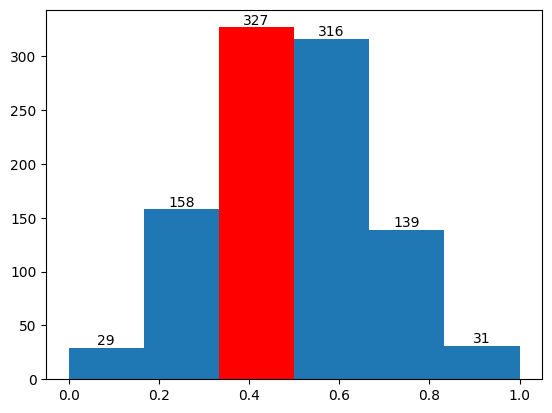

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

[-0.13995463 -0.0423658 ]


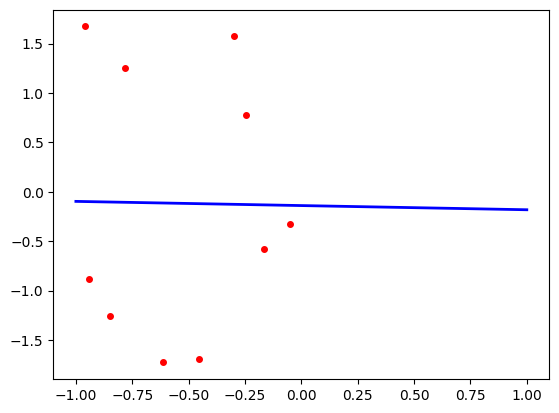

In [40]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

xplot = np.linspace(-1,1,20)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

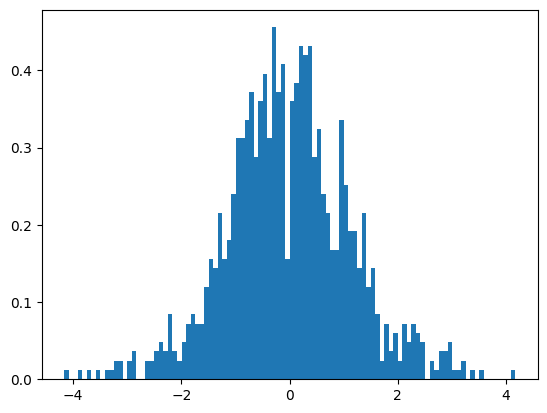

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta_hist = []
for _ in range(1000):
    SAMPLE_SIZE = 10

    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    beta_hist.append(beta)

fig, ax = plt.subplots()
ax.hist([x[1] for x in beta_hist], bins=100, density=True)
plt.show()

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

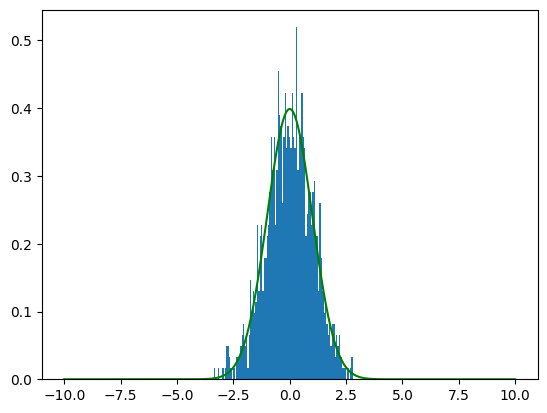

In [9]:
from scipy.stats import norm

beta_hist = []
for _ in range(1000):
    SAMPLE_SIZE = 10

    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    beta[0] = (beta[0] - 0) / np.sqrt(1 * np.diag(np.linalg.inv(X.T @ X))[0])
    beta[1] = (beta[1] - 0) / np.sqrt(1 * np.diag(np.linalg.inv(X.T @ X))[1])

    beta_hist.append(beta)

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist([x[0] for x in beta_hist], bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

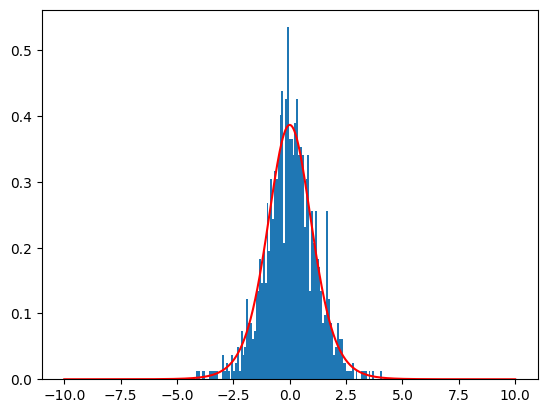

In [11]:
from scipy.stats import t

def standard_error(ytrue, ypred):
    n = len(ytrue)
    p = 2

    rss = 0
    for i in range(n):
        rss += (ytrue[i] - ypred[i])**2

    return np.sqrt(rss/(n - p))

beta_hist = []
for _ in range(1000):
    SAMPLE_SIZE = 10

    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    beta[0] = beta[0] / np.sqrt(standard_error(y, beta[0] + beta[1] * xlin)**2 * np.diag(np.linalg.inv(X.T @ X))[0])
    beta[1] = beta[1] / np.sqrt(standard_error(y, beta[0] + beta[1] * xlin)**2 * np.diag(np.linalg.inv(X.T @ X))[1])

    beta_hist.append(beta)

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist([x[0] for x in beta_hist], bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


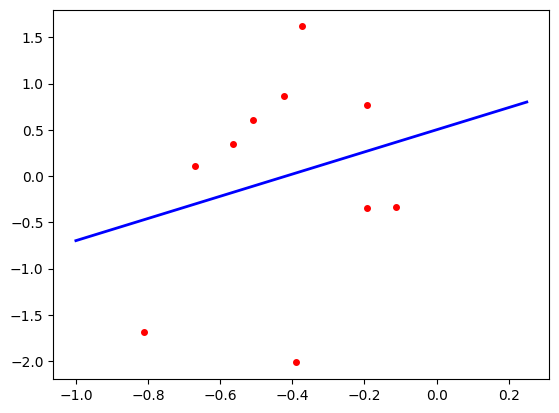

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [32]:
import numpy as np
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(y, 0)
print("p-value:", p_value)

p-value: 0.98505992603595


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))


0.996340970459672
0.9963573509523578
0.996390189147624
0.9964127813505544
0.9964127817651078
0.9964137403056418
0.9964434145242865
0.9965140179534706
0.9965495715784907
0.9965533206503261
0.9965577314262126
0.9968089626275248
0.996789507127937
0.9967914711704006
